In [2]:
#importing all the basic laibrary
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#loading the data file
df=pd.read_csv("Data file.csv")

In [4]:
#displaying the top 5 rows of data file
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


From above we can get to know what are the columns present and the basic idea of the data 

In [5]:
#displaying the bottom 5 rows of the data file
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [6]:
#displaying the number of rows and columns present in our data set
df.shape

(209593, 37)

In [7]:
#displaying the column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
#displaying the column names and the data type present in there respective column
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [9]:
#checking wheather null value is present or not 
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
#looking at the statistical information of our data set 
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


From above table we can see 
1)which columns has negative value by seeing into min row 
2)which column has outlier by comparing the difference between the 75% and   the max rows 
3)which column has skewness by comparing the mean and the 50% rows 

# FEATURE ENGINEERING 
TREATING COLUMS

we can observe that the column 'Unnmaed' contains inly serial number and it won't contribute in predicting analysis it better to drop this column

In [11]:
#droping the column 'Unnamed'
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [12]:
#checking the values present in column 'pcircle'
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

Column 'pcircle' has only one value throughout so we are droping this column

In [13]:
#droping the column 'pcircle'
df.drop(['pcircle'], axis=1,inplace=True)

In [14]:
#splitting data column into 'Year' 'Month' 'Date' column
df['Year']=df['pdate'].str.split('-').str[0]
df['Month']=df['pdate'].str.split('-').str[1]
df['Date']=df['pdate'].str.split('-').str[2]

In [15]:
#printing the first 5 rows to check wheather the above code is executed correctly or not
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Year,Month,Date
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,07,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,08,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,08,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,06,06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,06,22


Has we have splitted 'pdate' columns we can drop the pdate and we wont be loosing any data

In [16]:
#droping the 'pdate' column
df.drop(['pdate'], axis=1,inplace=True)

In [17]:
#checking for the value present in column 'Year' and checking their ferquency
df['Year'].value_counts()

2016    209593
Name: Year, dtype: int64

We can see that the column 'Year' has only one input that is year 2016 , So we can conclude that the data set is from 2016 and drop that column  

In [18]:
df.drop(['Year'], axis=1,inplace=True)

As we are going through the data we can see that the column 'msisdn' columns contain phone number and 'I' has been added unknowingly so its better to remove 'I' from that column 

In [19]:
#removing the letter 'I' from column 'msisdn'
df['msisdn'] = df['msisdn'].str.replace('I', '')

In [20]:
#Displaying the column 'msisdn' after removing the letter 'I'
df['msisdn']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn, Length: 209593, dtype: object

We can see that the phone number has nothing to do with predicting, we are droping that column

In [22]:
#droping the column 'msisdn'
df.drop(['msisdn'],axis=1,inplace=True)

From df.describe we can see that the column 'aon' which is nothing but age has negative value, but age cannot be negative so dispalying all the rows which have negative value in their 'aon' column

In [23]:
#displaying all the rows wich has negative 'aon' value
df_aon = df[df['aon'] < 0]
df_aon

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
30,1,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,2,10.0,946.0,473.0,1.80,3,32,2666,773.0,0.30,0.0,0.0,0,0,1,6,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,06,07
197,1,-36.0,32.075333,32.075333,1557.53,1557.53,1.000000,0.0,1539,1,0.0,1539.0,1539.0,4.87,1,0,1539,1539.0,4.87,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,06,13
322,1,-37.0,9.160000,9.160000,203.04,203.04,1.000000,0.0,770,2,16.0,943.0,471.5,12.30,2,16,943,471.5,12.30,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,06,12
504,1,-36.0,11.470333,11.470333,40.04,40.04,1.000000,0.0,770,1,0.0,770.0,770.0,8.40,1,0,770,770.0,8.40,0.0,0.0,0,0,1,6,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,06,13
603,1,-35.0,12.474000,12.474000,1823.08,1823.08,1.000000,0.0,1539,1,0.0,1539.0,1539.0,80.20,1,0,1539,1539.0,80.20,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,06,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208716,1,-34.0,19.260000,19.260000,714.15,714.15,1.000000,0.0,773,1,0.0,773.0,773.0,4.50,1,0,773,773.0,4.50,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,06,15
209121,1,-18.0,700.580000,700.600000,1057.72,1090.76,1.000000,0.0,770,1,0.0,770.0,770.0,25.00,1,0,770,770.0,25.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,07,01
209240,1,-28.0,10.640000,10.640000,133.35,133.35,1.000000,0.0,770,1,0.0,770.0,770.0,54.00,1,0,770,770.0,54.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,06,21
209421,1,-44.0,7.166667,7.166667,368.55,368.55,1.000000,0.0,773,1,0.0,773.0,773.0,29.00,1,0,773,773.0,29.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,06,05


In [24]:
#counting the label values in above column
df_aon['label'].value_counts()

1    1047
0     492
Name: label, dtype: int64

From above 2 cell we can see that the negative value is present in both the outcome of loan payer we can assume that the negative value has added unknowingly and we are coverting all negative values into positive in column 'aon'

In [25]:
#converting 'aon' column into positive value 
df['aon']=abs(df['aon'])

We can see negative values in columns 'last_rech_date_ma', 'last_rech_date_da','rental30','rental90' which are unlikely, SO we are coverting all those columns into positive values.

In [26]:
#converting column 'last_rech_date_ma' into positive value
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])

In [27]:
#converting column 'last_rech_date_da' into positive value
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [28]:
#converting column 'rental30 into positive value
df['rental30']=abs(df['rental30'])

In [29]:
#converting column 'rental90 into positive value
df['rental90']=abs(df['rental90'])

In [30]:
#checking the min values in all columns which we have converted into positive
a=df['aon'].min()
b=df['last_rech_date_ma'].min()
c=df['last_rech_date_da'].min()
d=df['rental30'].min()
e=df['rental90'].min()
print('\n',a,'\n',b,'\n',c,'\n',d,'\n',e)


 1.0 
 0.0 
 0.0 
 0.0 
 0.0


In [31]:
#checking the values which have entries other than 0,6,12
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

converting the above values into zero

In [32]:
#converting the above values into zero
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [34]:
#value count of column 'maxamnt_loan' after converting
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

checking for people who haven't taken any loan and deleting them as they are usless in building our model

In [35]:
#displaying the people who havent taken any loan
df1=pd.DataFrame(np.where(df['amnt_loans90']==0))
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042
0,127,149,187,212,262,431,441,475,488,570,590,963,965,978,983,1254,1263,1400,1592,1725,1844,1884,1972,2169,2219,2309,2497,2950,3230,3247,3333,3455,3494,3621,4026,4042,4110,4133,4228,4260,...,204796,205031,205172,205318,205498,205568,205815,205918,205964,206066,206119,206196,206207,206344,206370,206637,206754,206844,206957,207367,207390,207578,207582,207708,207718,207751,207787,207936,208016,208103,208137,208148,208231,208818,209213,209337,209343,209401,209406,209580


In [36]:
#droping the people who haven't taken any loan
df.drop(df[df['amnt_loans90']==0].index, inplace = True)

In [37]:
#checking the shape
df.shape

(207550, 35)

In [38]:
#displaying the column after featuring engineering
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Month', 'Date'],
      dtype='object')

In [39]:
#displaing statistic data after featuring engineering
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,8095.625616,5352.424286,6044.967417,2697.321812,3477.845090,3744.568567,3719.710805,2057.044751,3.991477,3728.164201,7719.908547,1809.560378,3856.541717,6.324110,7.707916,12380.958497,1856.325770,91.041710,262.338024,3742.660507,0.041759,0.046162,2.786138,18.128730,6.689790,0.054560,18.610723,23.878150,6.769116,0.046531,3.421201,4.350039
std,0.331908,75605.518933,9208.694592,10902.815812,4258.460653,5698.968928,53813.257533,53428.256336,2363.829442,4.264318,53603.753070,10154.119795,2065.621490,54049.919466,7.203957,12.594178,16849.059437,2071.485509,355.399706,4178.421510,53883.338931,0.399284,0.956046,2.552263,17.373116,2.107794,0.219043,225.235874,26.495145,2.005785,0.201625,8.796510,10.294639
min,0.000000,1.000000,-93.012667,-93.012667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,41.760000,41.979500,299.690000,326.340000,1.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,0.000000,1539.000000,3.000000,2.000000,4629.000000,1539.000000,33.930000,4.000000,2.000000,7218.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.714286
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,0.000000,2309.000000,5.000000,6.000000,10013.000000,1924.000000,83.000000,9.000000,8.000000,16000.000000,1924.000000,79.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.800000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [40]:
#displaying the column names and the data type present in there respective column
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

We can see that Date and Month are in object type, converting them into integer

In [41]:
#converting column 'Month' and 'Date' into integer data type
df['Month']=df['Month'].astype(int)
df['Date']=df['Date'].astype(int)

# EXPLORATORY DATA ANALYSIS
# Univariate analysis

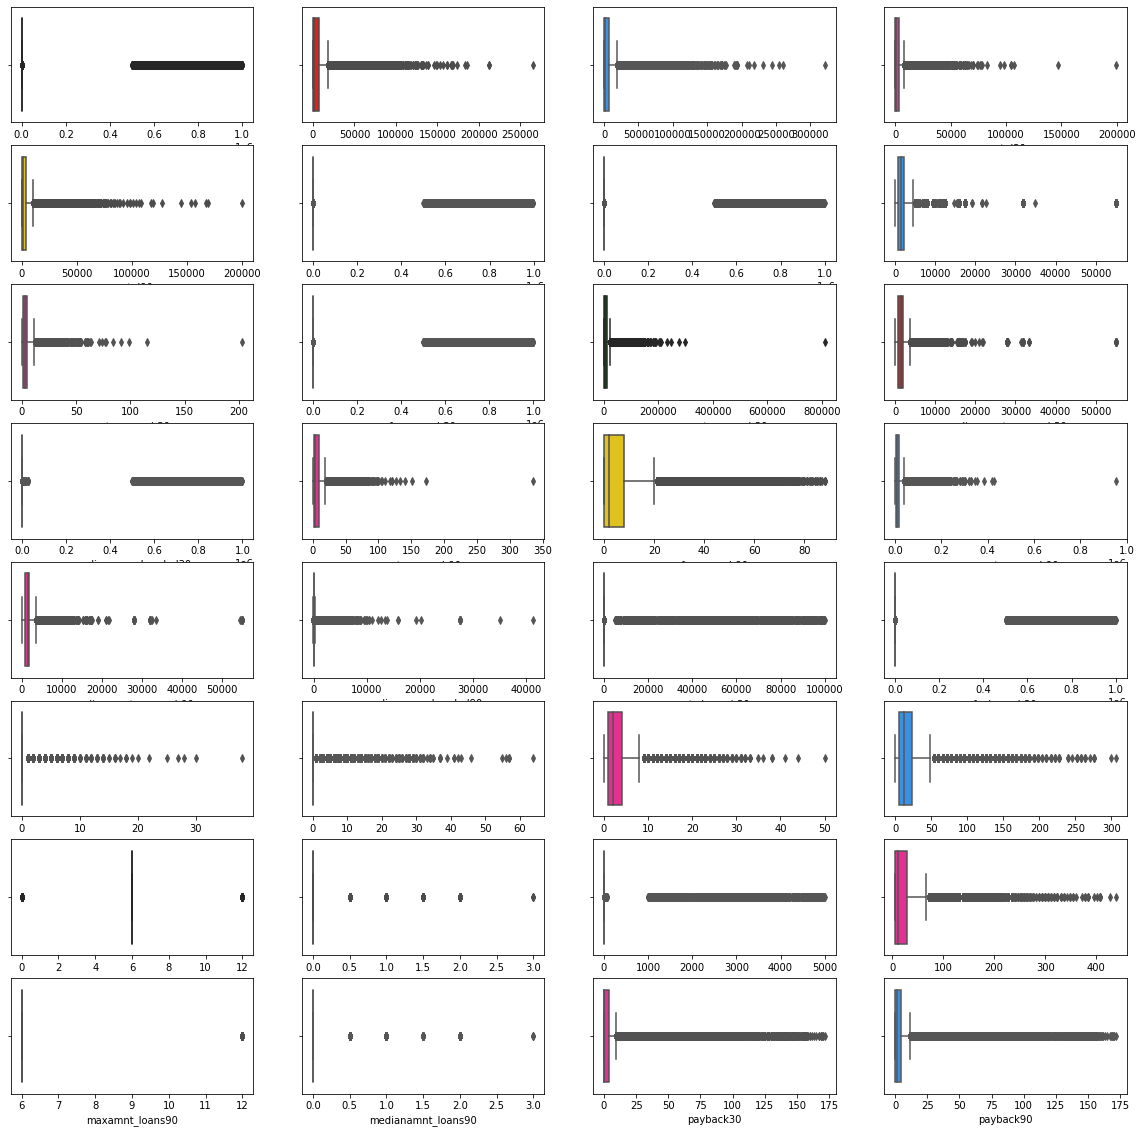

In [42]:
#ploting box plot for all the column
fig, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7, ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24),(ax25,ax26,ax27,ax28),(ax29,ax30,ax31,ax32)) = plt.subplots(nrows=8, ncols=4, figsize = (20, 20))
sn.boxplot(df['aon'] , color="g",ax=ax1)
sn.boxplot(df['daily_decr30'] , color="r",ax=ax2)
sn.boxplot(df['daily_decr90'] , color="dodgerblue",ax=ax3)
sn.boxplot(df['rental30'] , color="deeppink",ax=ax4)
sn.boxplot(df['rental90'] , color="gold",ax=ax5)
sn.boxplot(df['last_rech_date_ma'] , color="dodgerblue",ax=ax6)
sn.boxplot(df['last_rech_date_da'] , color="deeppink",ax=ax7)
sn.boxplot(df['last_rech_amt_ma'] , color="dodgerblue",ax=ax8)
sn.boxplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax9)
sn.boxplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax10)
sn.boxplot(df['sumamnt_ma_rech30'] , color="g",ax=ax11)
sn.boxplot(df['medianamnt_ma_rech30'] , color="r",ax=ax12)
sn.boxplot(df['medianmarechprebal30'] , color="dodgerblue",ax=ax13)
sn.boxplot(df['cnt_ma_rech90'] , color="deeppink",ax=ax14)
sn.boxplot(df['fr_ma_rech90'] , color="gold",ax=ax15)
sn.boxplot(df['sumamnt_ma_rech90'] , color="dodgerblue",ax=ax16)
sn.boxplot(df['medianamnt_ma_rech90'] , color="deeppink",ax=ax17)
sn.boxplot(df['medianmarechprebal90'] , color="dodgerblue",ax=ax18)
sn.boxplot(df['cnt_da_rech30'] , color="deeppink",ax=ax19)
sn.boxplot(df['fr_da_rech30'] , color="dodgerblue",ax=ax20)
sn.boxplot(df['cnt_da_rech90'] , color="deeppink",ax=ax21)
sn.boxplot(df['fr_da_rech90'] , color="dodgerblue",ax=ax22)
sn.boxplot(df['cnt_loans30'] , color="deeppink",ax=ax23)
sn.boxplot(df['amnt_loans30'] , color="dodgerblue",ax=ax24)
sn.boxplot(df['maxamnt_loans30'] , color="g",ax=ax25)
sn.boxplot(df['medianamnt_loans30'] , color="r",ax=ax26)
sn.boxplot(df['cnt_loans90'] , color="dodgerblue",ax=ax27)
sn.boxplot(df['amnt_loans90'] , color="deeppink",ax=ax28)
sn.boxplot(df['maxamnt_loans90'] , color="gold",ax=ax29)
sn.boxplot(df['medianamnt_loans90'] , color="dodgerblue",ax=ax30)
sn.boxplot(df['payback30'] , color="deeppink",ax=ax31)
sn.boxplot(df['payback90'] , color="dodgerblue",ax=ax32)

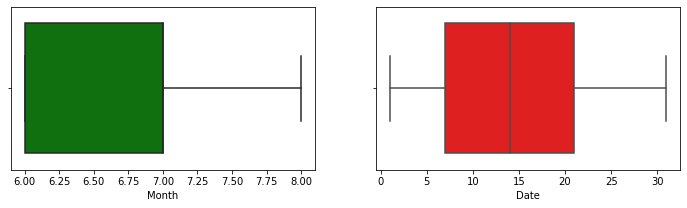

In [43]:
#ploting box plot for column 'Month' and 'Date'
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (12,3))
sn.boxplot(df['Month'] , color="g",ax=ax1)
sn.boxplot(df['Date'] , color="r",ax=ax2)

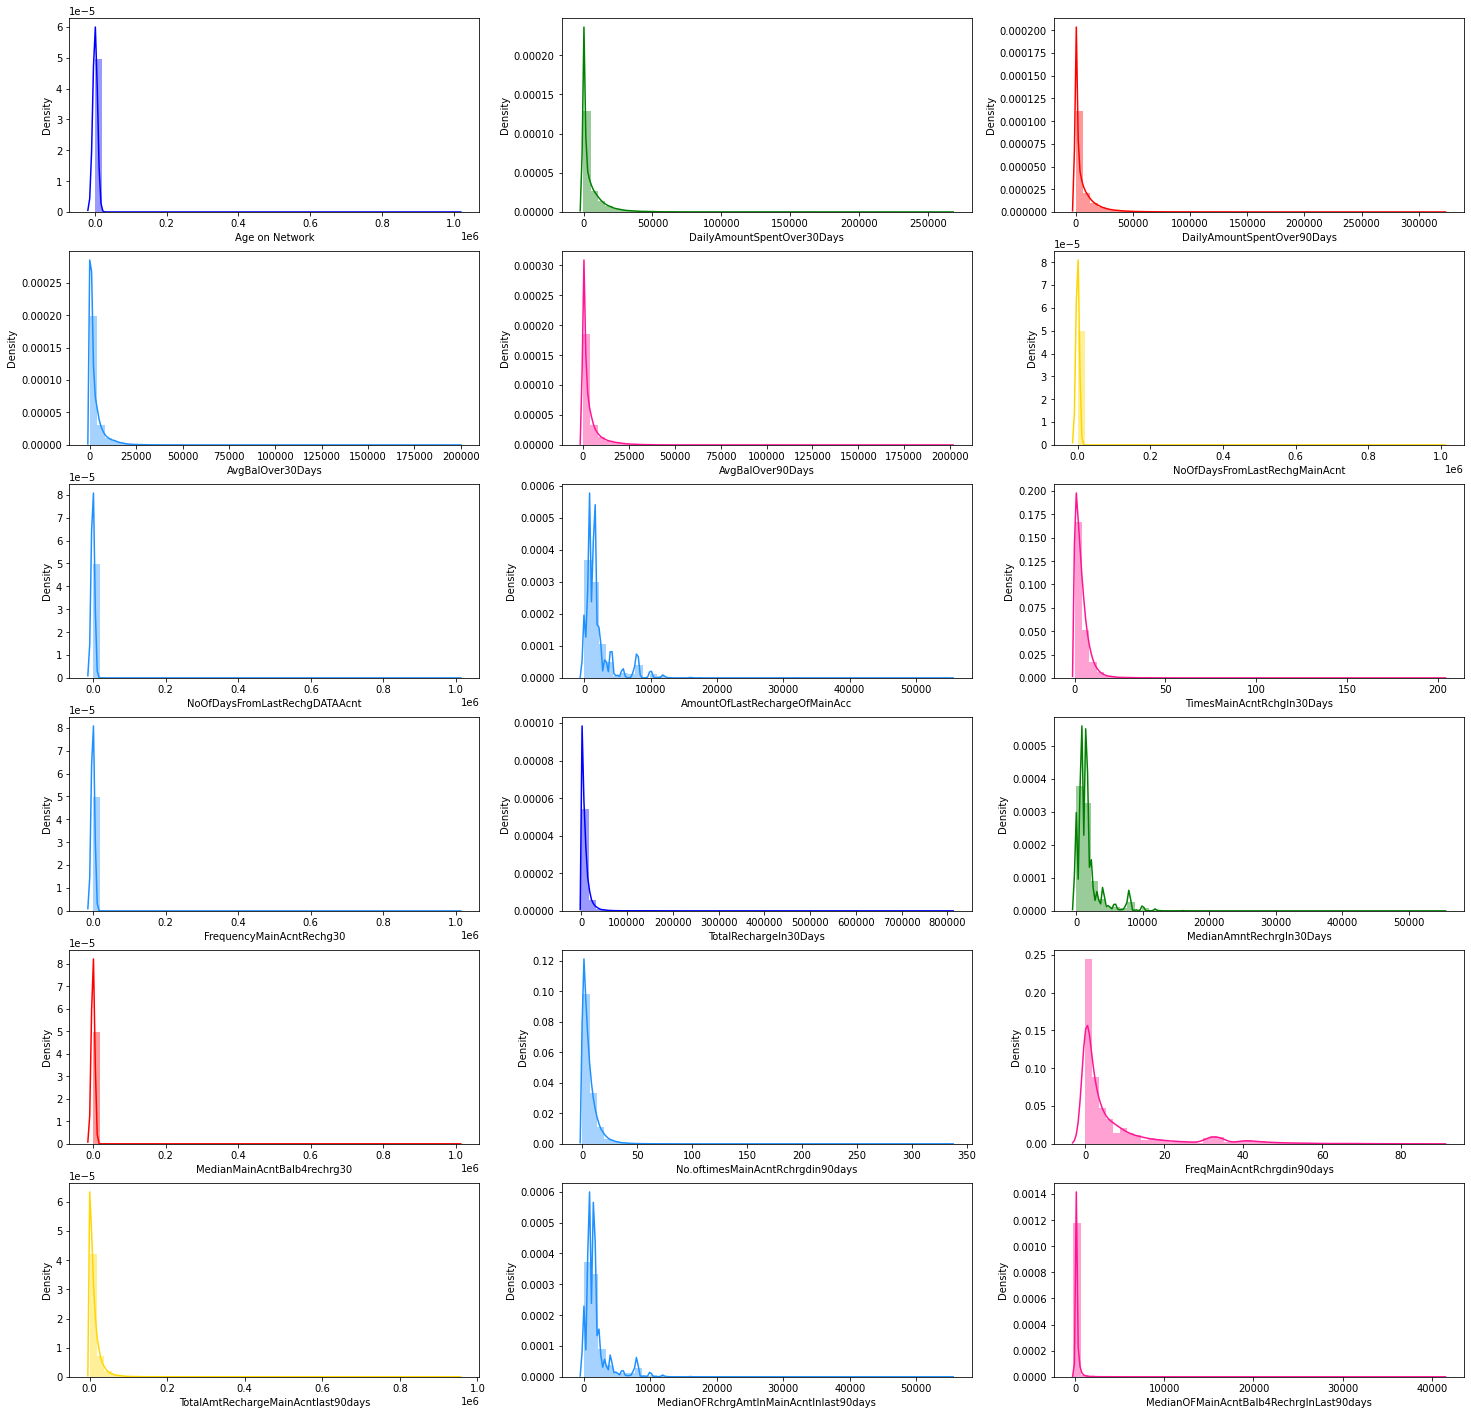

In [44]:
#ploting distribution curve for all the columns
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12), (ax13, ax14, ax15),(ax16, ax17, ax18)) = plt.subplots(nrows=6, ncols=3, figsize = (25, 25))
sn.distplot(df['aon'] , color="b",ax=ax1,axlabel='Age on Network')
sn.distplot(df['daily_decr30'] , color="g",ax=ax2,axlabel='DailyAmountSpentOver30Days')
sn.distplot(df['daily_decr90'] , color="r",ax=ax3,axlabel='DailyAmountSpentOver90Days')
sn.distplot(df['rental30'] , color="dodgerblue",ax=ax4,axlabel='AvgBalOver30Days')
sn.distplot(df['rental90'] , color="deeppink",ax=ax5,axlabel='AvgBalOver90Days')
sn.distplot(df['last_rech_date_ma'] , color="gold",ax=ax6,axlabel='NoOfDaysFromLastRechgMainAcnt')
sn.distplot(df['last_rech_date_da'] , color="dodgerblue",ax=ax7,axlabel='NoOfDaysFromLastRechgDATAAcnt')
sn.distplot(df['last_rech_amt_ma'] , color="dodgerblue",ax=ax8,axlabel='AmountOfLastRechargeOfMainAcc')
sn.distplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax9,axlabel='TimesMainAcntRchgIn30Days')
sn.distplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax10,axlabel='FrequencyMainAcntRechg30')
sn.distplot(df['sumamnt_ma_rech30'] , color="b",ax=ax11,axlabel='TotalRechargeIn30Days')
sn.distplot(df['medianamnt_ma_rech30'] , color="g",ax=ax12,axlabel='MedianAmntRechrgIn30Days')
sn.distplot(df['medianmarechprebal30'] , color="r",ax=ax13,axlabel='MedianMainAcntBalb4rechrg30')
sn.distplot(df['cnt_ma_rech90'] , color="dodgerblue",ax=ax14,axlabel='No.oftimesMainAcntRchrgdin90days')
sn.distplot(df['fr_ma_rech90'] , color="deeppink",ax=ax15,axlabel='FreqMainAcntRchrgdin90days')
sn.distplot(df['sumamnt_ma_rech90'] , color="gold",ax=ax16,axlabel='TotalAmtRechargeMainAcntlast90days')
sn.distplot(df['medianamnt_ma_rech90'] , color="dodgerblue",ax=ax17,axlabel='MedianOFRchrgAmtInMainAcntInlast90days')
sn.distplot(df['medianmarechprebal90'] , color="deeppink",ax=ax18,axlabel='MedianOFMainAcntBalb4RechrgInLast90days')


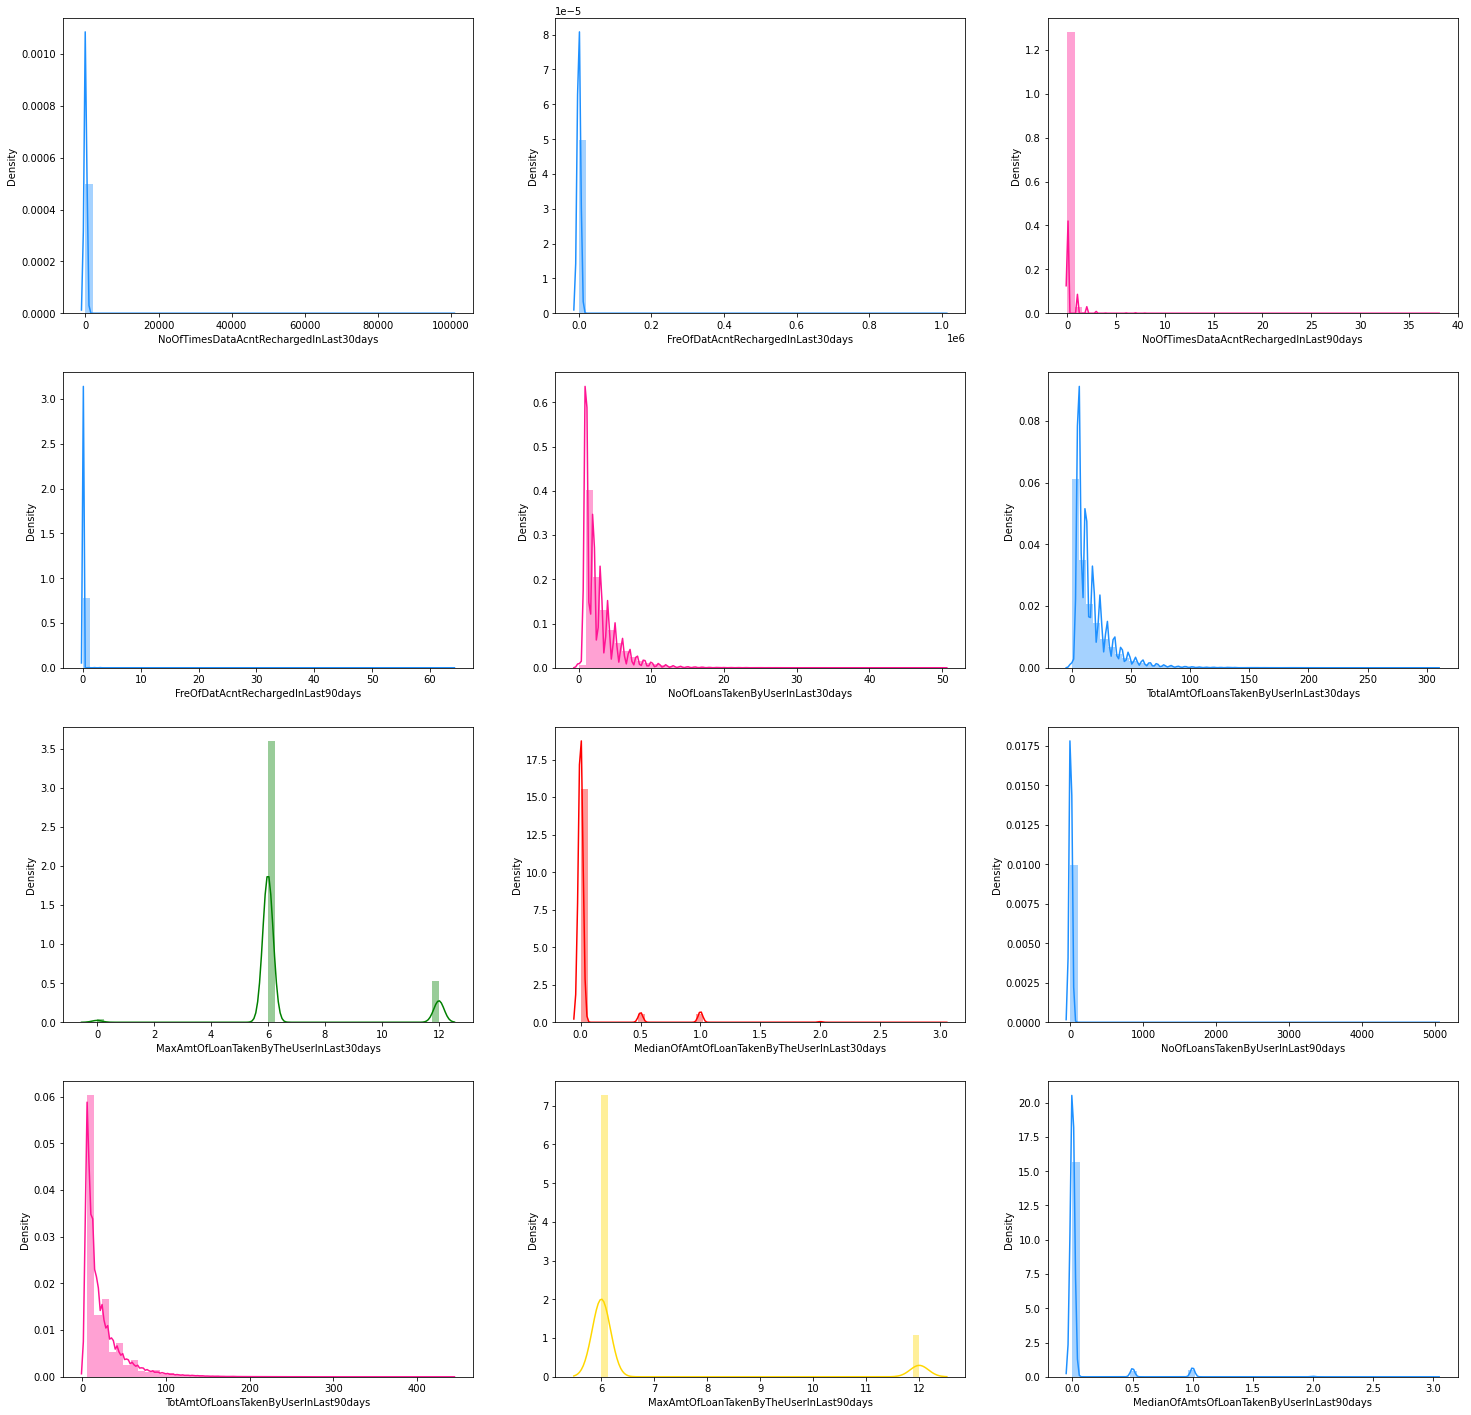

In [45]:
#ploting distribution curve for all the columns
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize = (25, 25))
sn.distplot(df['cnt_da_rech30'] , color="dodgerblue",ax=ax1,axlabel='NoOfTimesDataAcntRechargedInLast30days')
sn.distplot(df['fr_da_rech30'] , color="dodgerblue",ax=ax2,axlabel='FreOfDatAcntRechargedInLast30days')
sn.distplot(df['cnt_da_rech90'] , color="deeppink",ax=ax3,axlabel='NoOfTimesDataAcntRechargedInLast90days')
sn.distplot(df['fr_da_rech90'] , color="dodgerblue",ax=ax4,axlabel='FreOfDatAcntRechargedInLast90days')
sn.distplot(df['cnt_loans30'] , color="deeppink",ax=ax5,axlabel='NoOfLoansTakenByUserInLast30days')
sn.distplot(df['amnt_loans30'] , color="dodgerblue",ax=ax6,axlabel='TotalAmtOfLoansTakenByUserInLast30days')
sn.distplot(df['maxamnt_loans30'] , color="g",ax=ax7,axlabel='MaxAmtOfLoanTakenByTheUserInLast30days')
sn.distplot(df['medianamnt_loans30'] , color="r",ax=ax8,axlabel='MedianOfAmtOfLoanTakenByTheUserInLast30days')
sn.distplot(df['cnt_loans90'] , color="dodgerblue",ax=ax9,axlabel='NoOfLoansTakenByUserInLast90days')
sn.distplot(df['amnt_loans90'] , color="deeppink",ax=ax10,axlabel='TotAmtOfLoansTakenByUserInLast90days')
sn.distplot(df['maxamnt_loans90'] , color="gold",ax=ax11,axlabel='MaxAmtOfLoanTakenByTheUserInLast90days')
sn.distplot(df['medianamnt_loans90'] , color="dodgerblue",ax=ax12,axlabel='MedianOfAmtsOfLoanTakenByUserInLast90days')

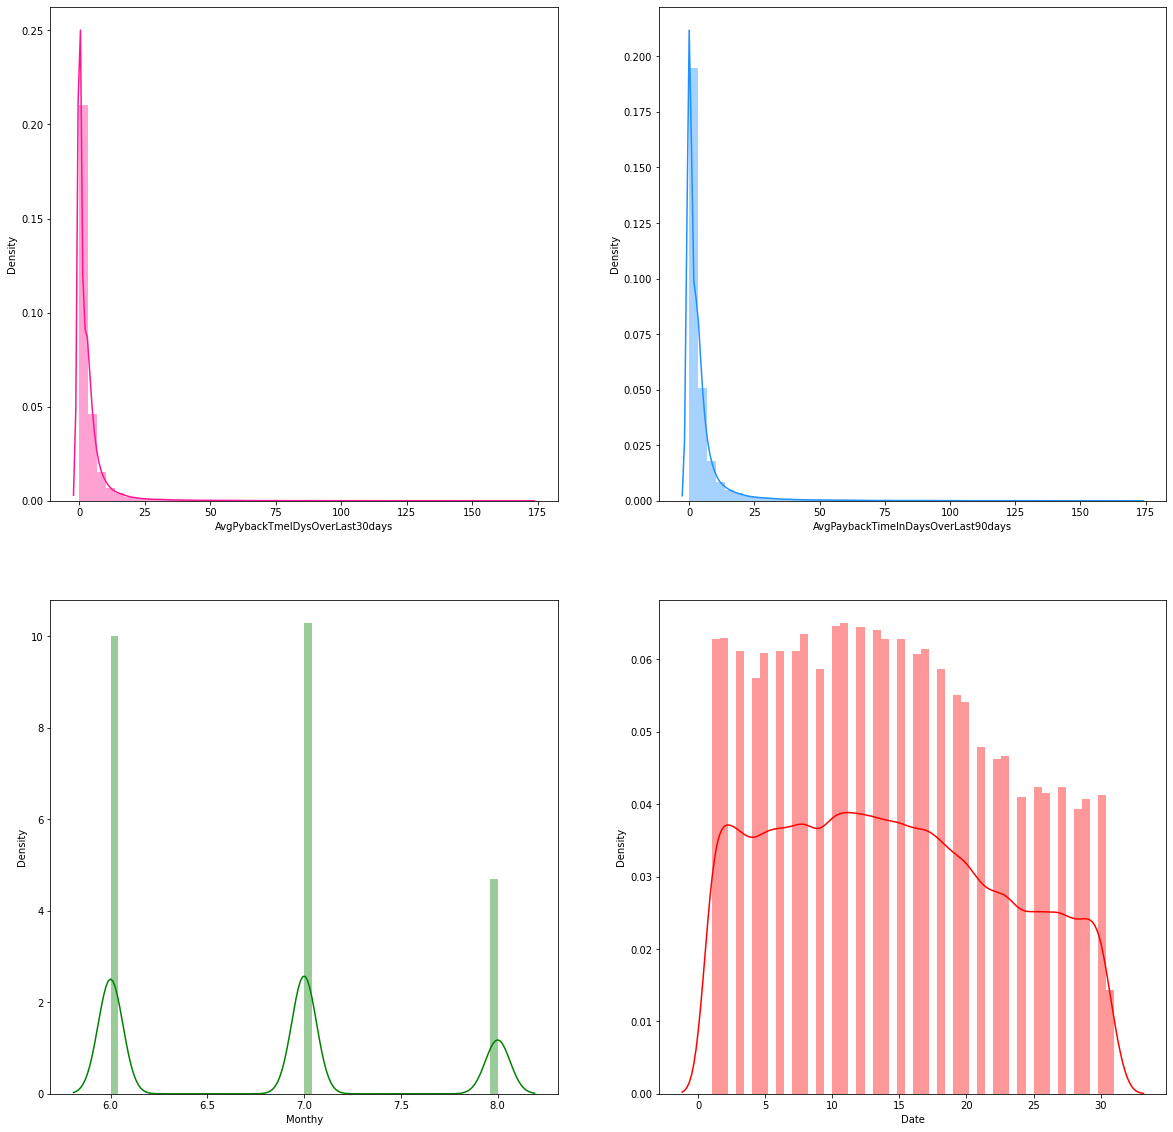

In [46]:
#ploting distribution curve for all the columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize = (20,20))
sn.distplot(df['payback30'] , color="deeppink",ax=ax1,axlabel='AvgPybackTmeIDysOverLast30days')
sn.distplot(df['payback90'] , color="dodgerblue",ax=ax2,axlabel='AvgPaybackTimeInDaysOverLast90days')
sn.distplot(df['Month'] , color="g",ax=ax3,axlabel='Monthy')
sn.distplot(df['Date'] , color="r",ax=ax4,axlabel='Date')

From above box plot and distribution curve we can see that the outlier and skewness both are present in large number

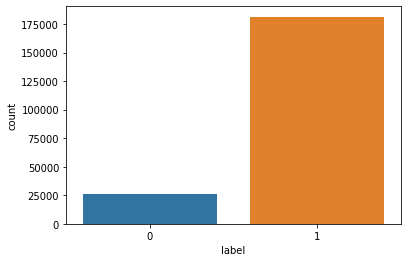

In [47]:
#ploting count plot for column label
sn.countplot(df['label'])

We can see that the imbalance between the two output class is very high

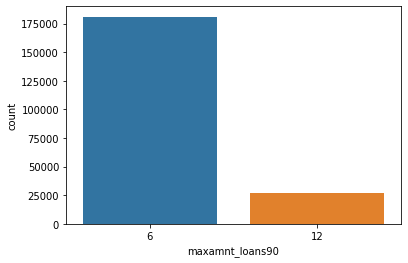

In [48]:
#ploting count plot for column 'maxamnt_loans90'
sn.countplot(df['maxamnt_loans90'])

we can see value counts of column 'maxamnt_loans90'

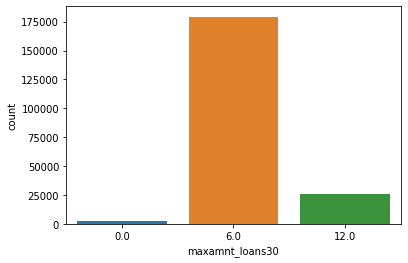

In [49]:
#ploting count plot for column 'maxamnt_loans30'
sn.countplot(df['maxamnt_loans30'])

we can see value counts of column 'maxamnt_loans30'

## Bivariate analysis

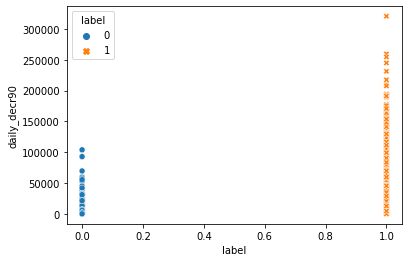

In [50]:
#ploting scatter plot between 'label'and 'daily_decr90'
sn.scatterplot(x=df['label'],y=df['daily_decr90'],hue=df['label'],style=df['label'])

Average of daily amount spent by the people who has paid back the credit amount within 5 days is higher than that of people who has paid back the credit amount after  5 days

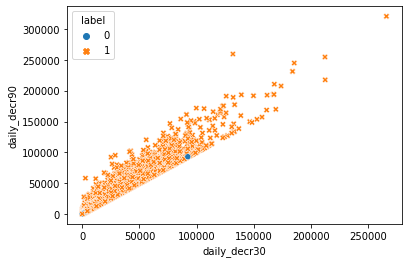

In [51]:
#ploting scatter plot between 'daily_decr30'and 'daily_decr90'
sn.scatterplot(x=df['daily_decr30'],y=df['daily_decr90'],hue=df['label'],style=df['label'])

relation between average of daily amount spent over last 30 days and average of daily amount spent over last 90 days is positive and most of them are  user paid back the credit amount within 5 days

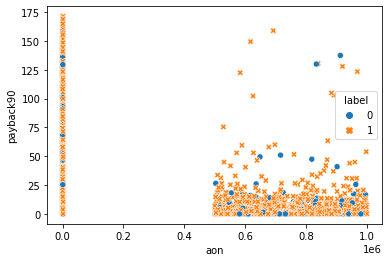

In [53]:
#ploting scatter plot between 'payback90' and 'aon'
sn.scatterplot(x=df['aon'],y=df['payback90'],hue=df['label'],style=df['label'])

It seems like age has no such corelation with average payback time in days over last 90 days

## 30 DAYS DATA 

Text(0.5, 1.0, 'Daily amount spent from main account, averaged over last 30 days ')

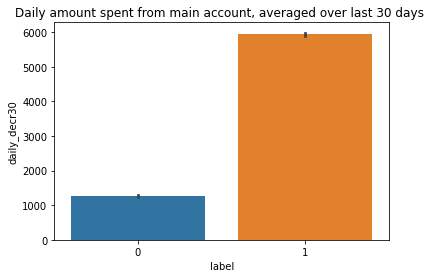

In [54]:
#ploting bar plot between 'label' and 'daily_decr30'
sn.barplot(x=df['label'],y=df['daily_decr30'])
plt.title('Daily amount spent from main account, averaged over last 30 days ')

Text(0.5, 1.0, 'Average main account balance over last 30 days')

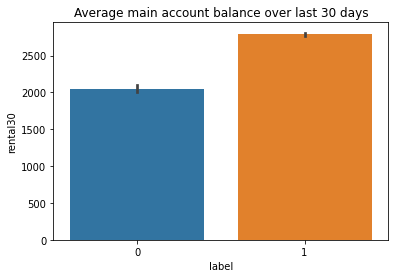

In [55]:
#ploting bar plot between 'label' and 'rental30'
sn.barplot(x=df['label'],y=df['rental30'])
plt.title('Average main account balance over last 30 days')

Text(0.5, 1.0, 'Number of times main account got recharged in last 30 days')

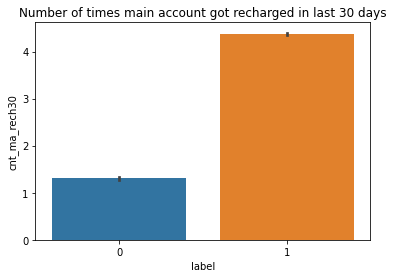

In [56]:
#ploting bar plot between 'label' and 'cnt_ma_rech30'
sn.barplot(x=df['label'],y=df['cnt_ma_rech30'])
plt.title('Number of times main account got recharged in last 30 days')

Text(0.5, 1.0, 'Total amount of recharge in main account over last 30 days')

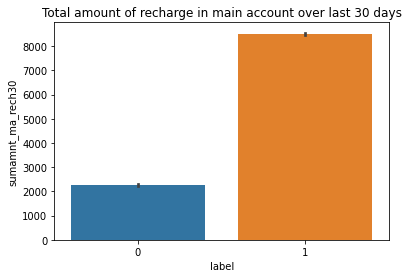

In [57]:
#ploting bar plot between 'label' and 'sumamnt_ma_rech30'
sn.barplot(x=df['label'],y=df['sumamnt_ma_rech30'])
plt.title('Total amount of recharge in main account over last 30 days')

Text(0.5, 1.0, 'Number of times data account got recharged in last 30 days')

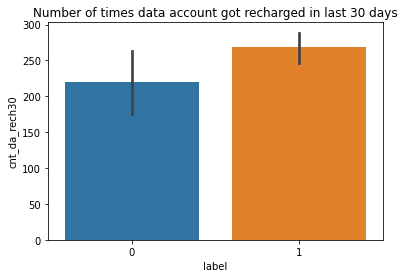

In [58]:
#ploting bar plot between 'label' and 'cnt_da_rech30'
sn.barplot(x=df['label'],y=df['cnt_da_rech30'])
plt.title('Number of times data account got recharged in last 30 days')

Text(0.5, 1.0, 'Number of loans taken by user in last 30 days')

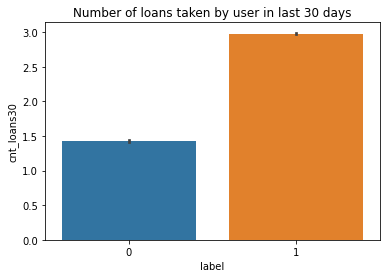

In [59]:
#ploting bar plot between 'label' and 'cnt_loans30'
sn.barplot(x=df['label'],y=df['cnt_loans30'])
plt.title('Number of loans taken by user in last 30 days')

Text(0.5, 1.0, 'Total amount of loans taken by user in last 30 days')

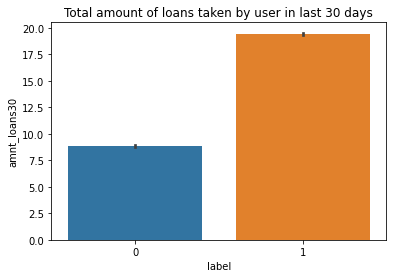

In [60]:
#ploting bar plot between 'label' and 'amnt_loans30'
sn.barplot(x=df['label'],y=df['amnt_loans30'])
plt.title('Total amount of loans taken by user in last 30 days')

Text(0.5, 1.0, 'maximum amount of loan taken by user in 30 days')

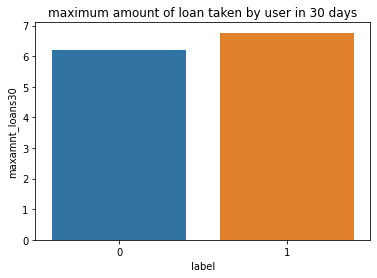

In [61]:
#ploting bar plot between 'label' and 'maxamnt_loans30'
sn.barplot(x=df['label'],y=df['maxamnt_loans30'])
plt.title('maximum amount of loan taken by user in 30 days')

## 90 DAYS DATA

Text(0.5, 1.0, 'Daily amount spent from main account, averaged over last 90 days ')

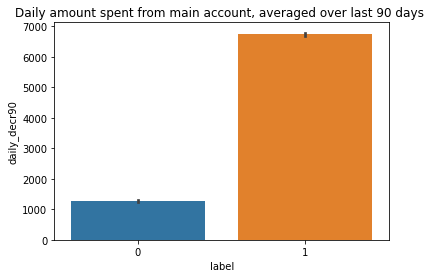

In [62]:
#ploting bar plot between 'label' and 'daily_decr90'
sn.barplot(x=df['label'],y=df['daily_decr90'])
plt.title('Daily amount spent from main account, averaged over last 90 days ')

Text(0.5, 1.0, 'Average main account balance over last 90 days')

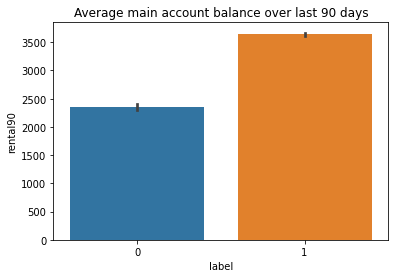

In [63]:
#ploting bar plot between 'label' and 'rental90'
sn.barplot(x=df['label'],y=df['rental90'])
plt.title('Average main account balance over last 90 days')

Text(0.5, 1.0, 'Total amount of recharge in main account over last 90 days')

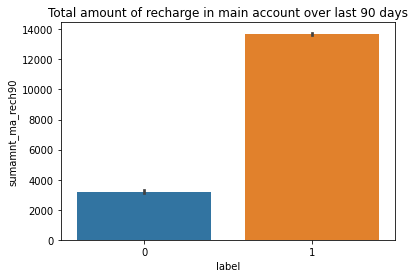

In [65]:
#ploting bar plot between 'label' and 'sumamnt_ma_reach90'
sn.barplot(x=df['label'],y=df['sumamnt_ma_rech90'])
plt.title('Total amount of recharge in main account over last 90 days')

Text(0.5, 1.0, 'Number of times data account got recharged in last 90 days')

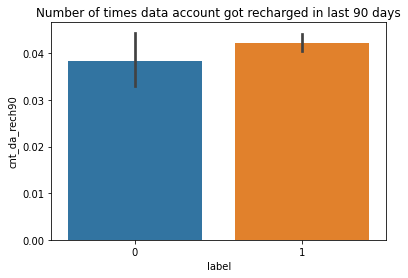

In [66]:
#ploting bar plot between 'label' and 'cnt_da_reach90'
sn.barplot(x=df['label'],y=df['cnt_da_rech90'])
plt.title('Number of times data account got recharged in last 90 days')

Text(0.5, 1.0, 'Number of loans taken by user in last 90 days')

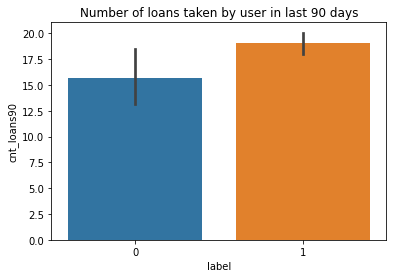

In [67]:
#ploting bar plot between 'label' and 'cnt_loans90'
sn.barplot(x=df['label'],y=df['cnt_loans90'])
plt.title('Number of loans taken by user in last 90 days')

Text(0.5, 1.0, 'Total amount of loans taken by user in last 90 days')

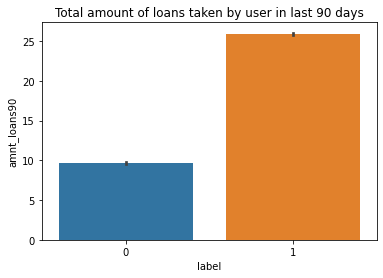

In [68]:
#ploting bar plot between 'label' and 'amnt_loans90'
sn.barplot(x=df['label'],y=df['amnt_loans90'])
plt.title('Total amount of loans taken by user in last 90 days')

Text(0.5, 1.0, 'maximum amount of loan taken by user in 90 days')

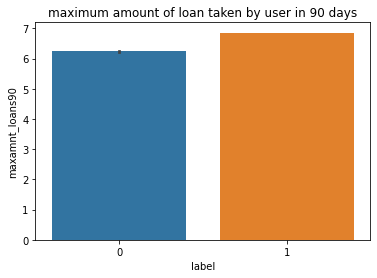

In [69]:
#ploting bar plot between 'label' and 'maxamnt_loans90'
sn.barplot(x=df['label'],y=df['maxamnt_loans90'])
plt.title('maximum amount of loan taken by user in 90 days')

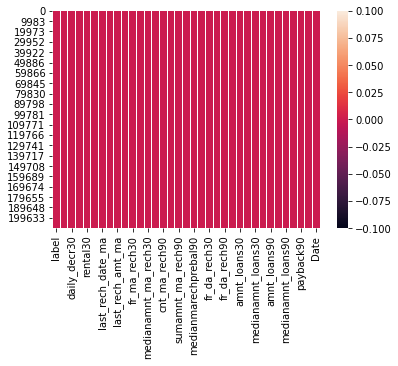

In [70]:
#ploting heat map to see wheather null value is present or not
sn.heatmap(df.isnull())

No null value is present 

In [71]:
#seeing correlation of each parameter with label column
df_Cor=df.corr()
df_Cor['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.239399
cnt_ma_rech90           0.237831
sumamnt_ma_rech90       0.206712
sumamnt_ma_rech30       0.204252
amnt_loans90            0.204055
amnt_loans30            0.202318
cnt_loans30             0.201600
daily_decr30            0.168267
daily_decr90            0.166020
Month                   0.151680
medianamnt_ma_rech30    0.142047
last_rech_amt_ma        0.131744
medianamnt_ma_rech90    0.120616
maxamnt_loans90         0.101247
maxamnt_loans30         0.087468
fr_ma_rech90            0.084565
rental90                0.075098
rental30                0.057860
payback90               0.050577
payback30               0.049668
medianamnt_loans30      0.045556
medianmarechprebal90    0.040006
medianamnt_loans90      0.036635
Date                    0.008241
cnt_loans90             0.004902
cnt_da_rech30           0.003832
last_rech_date_ma       0.003676
cnt_da_rech90           0.003253
last_rech_date_da       0.001772
fr_ma_rech

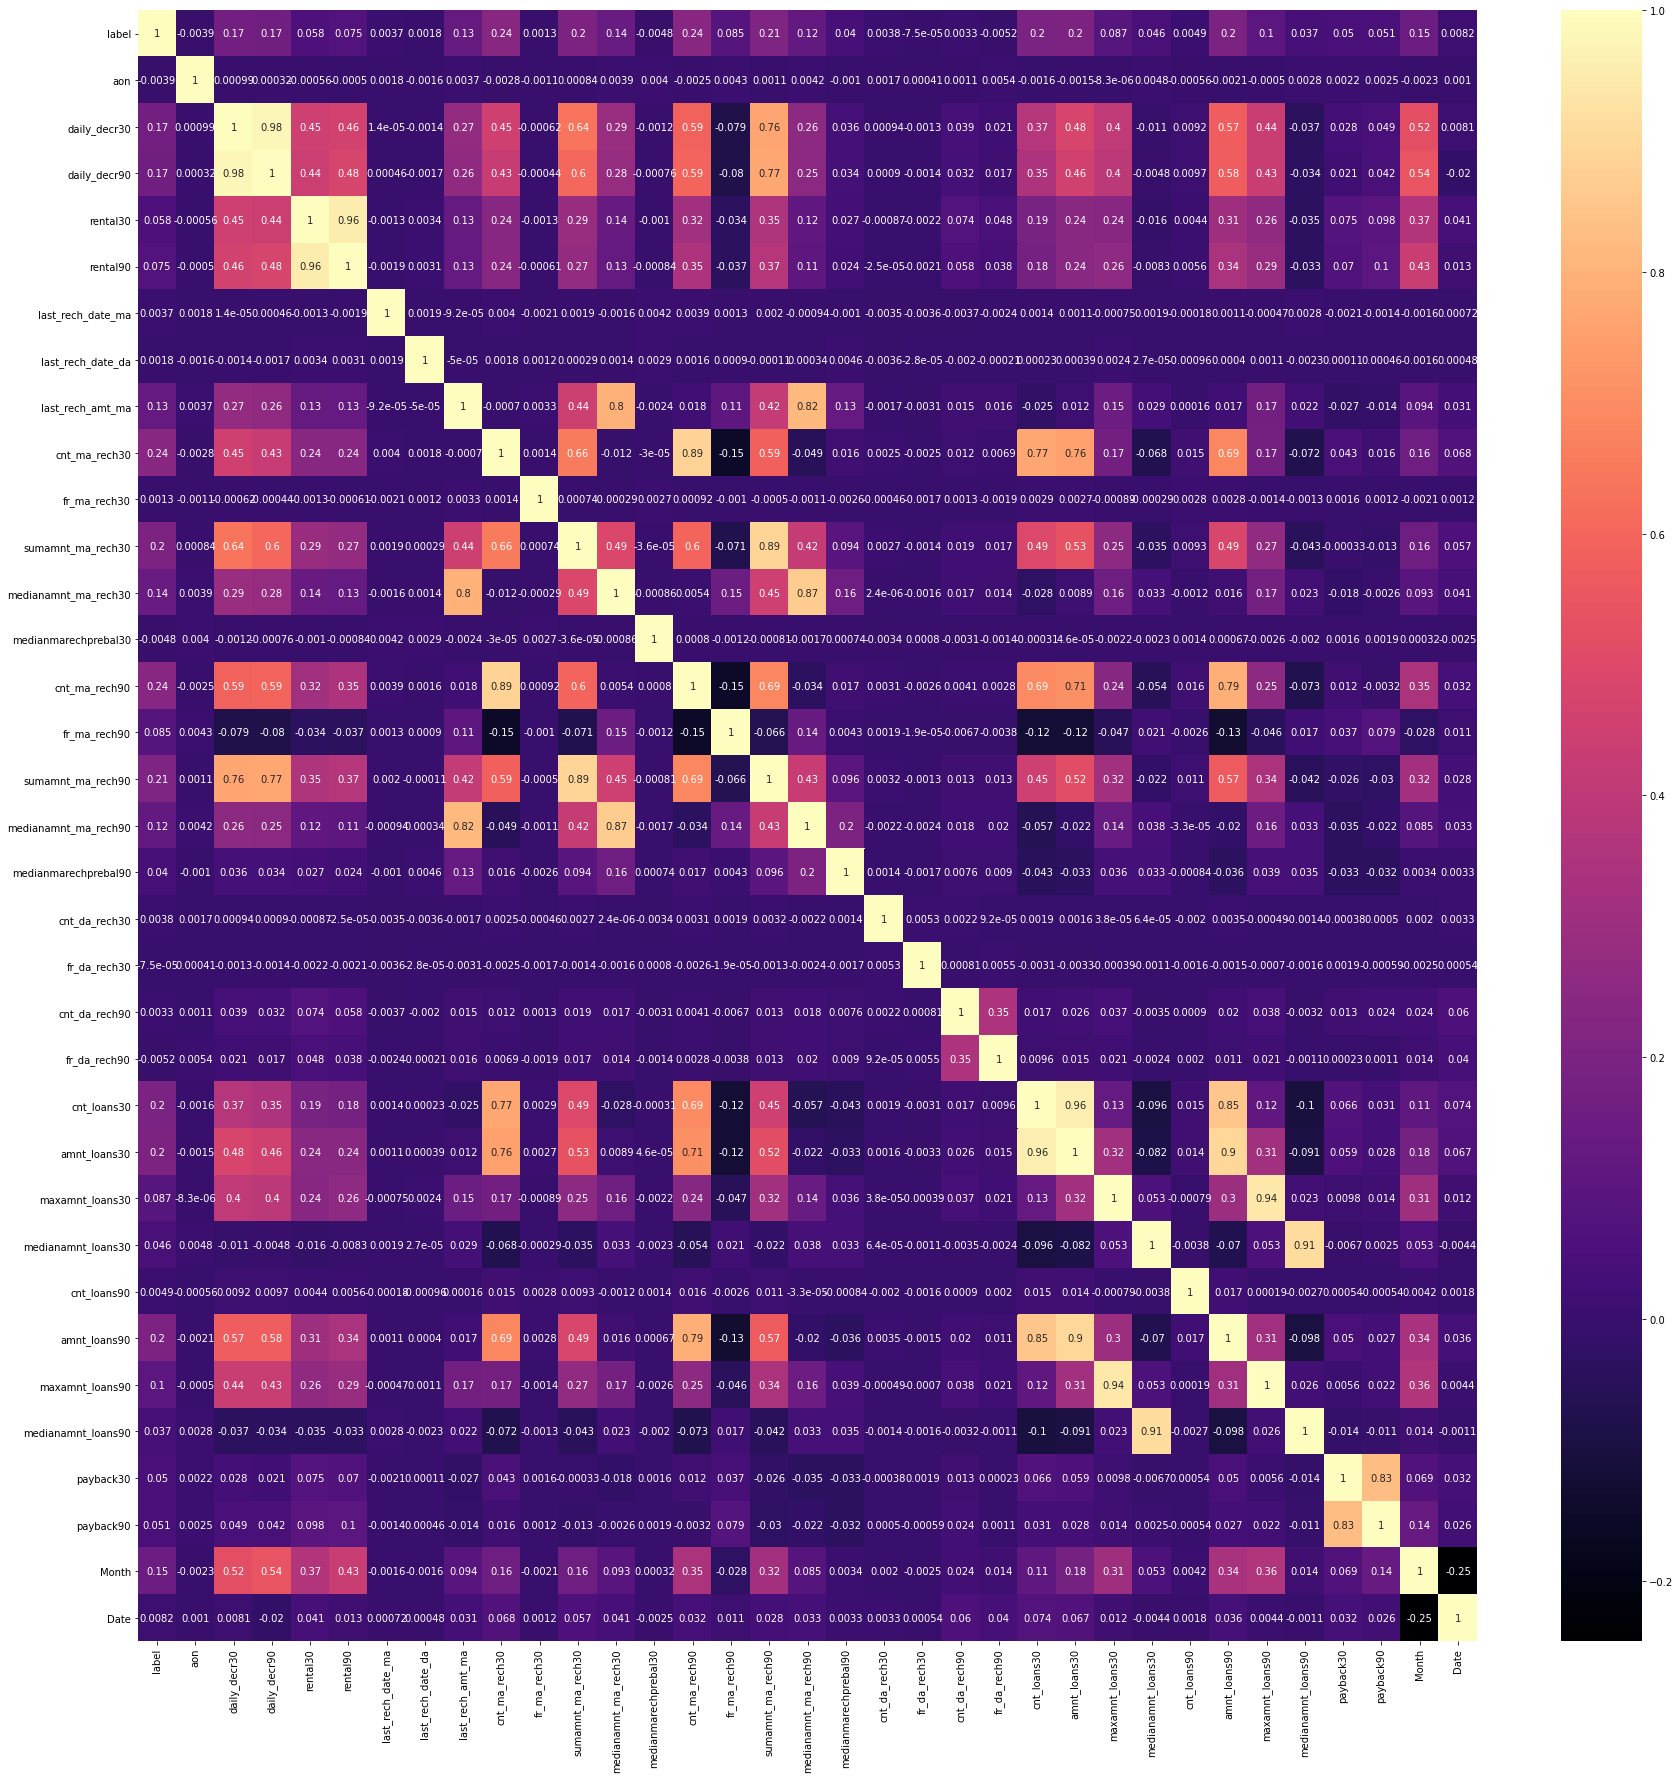

In [72]:
#ploting heat map for correlation matrix
plt.figure(figsize=(30,30))
sn.heatmap(df_Cor,cmap='magma',annot=True)

## Problem found 
outlier is present, skewness present, scale between each parameter is not even, class imbalance is present, no null values

# DATA CLEANING
## Outlier removal

In [73]:
#removing outlier by z score method
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",df1.shape)

Before removing outliers:: (207550, 35)
After removing outliers:: (1, 2043)


In [74]:
#removing outlier by IQR method
from scipy import stats 
IQR = stats.iqr(df) 
print('IQR =',IQR)
print('\n')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_new2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('df shape after IQR',df_new2.shape)

IQR = 117.44


df shape after IQR (31988, 35)


It is found that we are loosing more than 10% of data from both the method. So,we are not removing the outlier

In [75]:
#spliting into X and Y
x=df.drop(['label'],axis=1)
y=df['label']

## Skewness removal
 

In [76]:
#checking for skewness in each column
df.skew()

label                   -2.253346
aon                     10.405391
daily_decr30             3.958076
daily_decr90             4.271553
rental30                 4.482579
rental90                 4.385412
last_rech_date_ma       14.811309
last_rech_date_da       14.800734
last_rech_amt_ma         3.816086
cnt_ma_rech30            3.281183
fr_ma_rech30            14.795085
sumamnt_ma_rech30        6.401056
medianamnt_ma_rech30     3.536513
medianmarechprebal30    14.771022
cnt_ma_rech90            3.427321
fr_ma_rech90             2.287143
sumamnt_ma_rech90        4.912399
medianamnt_ma_rech90     3.779987
medianmarechprebal90    45.474129
cnt_da_rech30           17.809395
fr_da_rech30            14.800625
cnt_da_rech90           27.174360
fr_da_rech90            28.846031
cnt_loans30              2.727858
amnt_loans30             2.988796
maxamnt_loans30          1.634976
medianamnt_loans30       4.525781
cnt_loans90             16.565686
amnt_loans90             3.152557
maxamnt_loans9

Almost very column is skewed applying power transfer is better

In [77]:
#removing skewness by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

## Scaling

In [78]:
#applying standard scaling method on X parameters 
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)

## Class imbalance removal

In [79]:
#applying over sampling on X and Y parameters 
from imblearn.over_sampling import SMOTE
NR=SMOTE()
x_over,y_over=NR.fit_resample(x,y)

In [80]:
#import library
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

## Finding best random state

In [81]:
#maxAccu=0
#maxRS=0
#for i in range(1,100):
  #x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.33,random_state=i)
  #mod=DecisionTreeClassifier()
  #mod.fit(x_train,y_train)
  #pred=mod.predict(x_test)
  #acc=accuracy_score(y_test,pred)
  #if acc>maxAccu:
    #maxAccu=acc
    #maxRS=i
#print('Best accuracy is ',maxAccu,' on random state ',maxRS)

As data set is large I am assuming best random state by myself  

## Train test split

In [82]:
#train, test, split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.33,random_state=46)

#Model building 
##RandomForestClassifier

In [83]:
#building model using RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     59615
           1       0.96      0.95      0.95     60102

    accuracy                           0.95    119717
   macro avg       0.95      0.95      0.95    119717
weighted avg       0.95      0.95      0.95    119717



In [84]:
#cross validation of randon forest classifier
print(cross_val_score(RFC,x_over,y_over,cv=5).mean())

0.9500713010578131


The difference accuracy score and cross validation score of RandomForestClassifier is 0 and accuracy is 95%

In [85]:
 #building model using DecisionTreeClassifier 
  DTC=DecisionTreeClassifier()
  DTC.fit(x_train,y_train)
  pred=DTC.predict(x_test)
  acc=classification_report(y_test,pred)
  print(acc)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     59615
           1       0.91      0.90      0.91     60102

    accuracy                           0.91    119717
   macro avg       0.91      0.91      0.91    119717
weighted avg       0.91      0.91      0.91    119717



In [86]:
#cross validation of randon forest classifier
DTC_cval=(cross_val_score(DTC,x_over,y_over,cv=5).mean())

In [87]:
DTC_cval

0.9098398858524146


The difference accuracy score and cross validation score of DecisionTreeClassifier is 1 and accuracy is 91%

In [89]:
#building model using LinearSVC
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, y_train.ravel())
pred=clf.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77     59615
           1       0.78      0.76      0.77     60102

    accuracy                           0.77    119717
   macro avg       0.77      0.77      0.77    119717
weighted avg       0.77      0.77      0.77    119717



In [90]:
#cross validation of LinearSVC
SVC_cval=(cross_val_score(clf,x_over,y_over,cv=5).mean())

In [91]:
SVC_cval

0.7702962803845065


The difference accuracy score and cross validation score of LinearSVC is 0 and accuracy is 77%

In [92]:
#building model using LogisticRegression
LRE=LogisticRegression()
LRE.fit(x_train,y_train)
pred=LRE.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77     59615
           1       0.78      0.75      0.77     60102

    accuracy                           0.77    119717
   macro avg       0.77      0.77      0.77    119717
weighted avg       0.77      0.77      0.77    119717



In [93]:
#cross validation of LogisticRegression
LRE_cval=(cross_val_score(LRE,x_over,y_over,cv=5).mean())

In [94]:
LRE_cval

0.7711342644496185


The difference accuracy score and cross validation score of LogisticRegression is 0 and accuracy is 77%

# HYPER PARAMETER TUNING

we have selected the our RandomForestClassifier model for Hyper parameter tuning as it is has high accuracy

In [106]:
#selecting the required parameter
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]

In [107]:
#building parameter grid
param_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split}

In [108]:
#applying grid search cv
GCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)

In [109]:
#training the model
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [112]:
#selecting parameters best value
GCV.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 5}

In [113]:
#tuning on RandomForestClassifier
Final_mod=RandomForestClassifier(max_depth=4,max_features='sqrt',min_samples_split=5)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.3513034907323


We have absorbed that after tuning accuracy has fallen down to 79%,
 so we are retaining RandomForestClassifier(RFC) model as our final model

# Roc_Auc_Curve

In [115]:
#importing library
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [117]:
y_pred_prob=RFC.predict_proba(x_test)[:,1]

In [119]:
#false positive rate and true positive rate
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

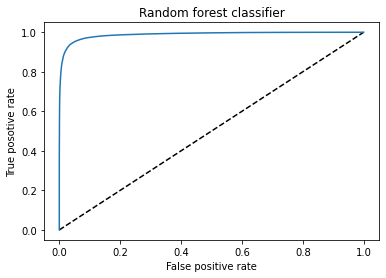

In [127]:
#ploting roc curve
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.title('Random forest classifier')
plt.show()

#Saving the Model

In [128]:
#saving the model
import joblib
joblib.dump(RFC,'FinalModel.pkl')

['FinalModel.pkl']

#We have got model which has accuracy score of 95%